# Analysis


In [3]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
from scipy.stats import linregress
import requests
import json
from citipy import citipy
import time

# set latitude and longitude ranges
lat = (-90, 90)
lng = (-180, 180)

# base_url

base_url = f"http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# query url 
query_url = f"{base_url}appid={api_key}&units={units}&q="

In [5]:
# create lists to store cities and coordinates
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)

lat_lngs = zip(lats, lngs)

# use citipy to find nearest cities with coordinates 

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
    
print(len(cities))
    

635


In [8]:
# create counters and lists
city_names = []
latitudes = []
longitudes = []
country_name = []
wind_speed = []
cloudiness = []
humidity = []
temperature = []
date = []
index_counter = 0 
set_counter = 1

In [7]:
# Retrieve data for cities
for city in cities:
    try:
        
        # API Call
        response = requests.get(query_url + city).json()
        
        
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country_name.append(response['sys']['country'])
        date.append(response['dt'])
        
        
        if index_counter > 50:
            index_counter = 0
            set_counter += 1
            city_names.append(city)
        else:
            index_counter += 1
            city_names.append(city)
            print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
    except (KeyError, IndexError):
        
        print("City not found. Skipping...")


Processing Record 1 of Set 1 | ushuaia
City not found. Skipping...
City not found. Skipping...
Processing Record 2 of Set 1 | marawi
City not found. Skipping...
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | nome
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | berlevag
Processing Record 8 of Set 1 | kailua
Processing Record 9 of Set 1 | yar-sale
Processing Record 10 of Set 1 | xining
Processing Record 11 of Set 1 | erenhot
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | kaohsiung
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | victoria
City not found. Skipping...
Processing Record 16 of Set 1 | chapais
Processing Record 17 of Set 1 | busselton
City not found. Skipping...
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | saint george
City not found. Skipping...
Processing Record 21 of Set 

Processing Record 29 of Set 4 | sao filipe
Processing Record 30 of Set 4 | ibra
Processing Record 31 of Set 4 | acapulco
Processing Record 32 of Set 4 | imeni poliny osipenko
Processing Record 33 of Set 4 | meulaboh
Processing Record 34 of Set 4 | chalchihuites
Processing Record 35 of Set 4 | uyuni
Processing Record 36 of Set 4 | road town
Processing Record 37 of Set 4 | hasaki
Processing Record 38 of Set 4 | isabela
Processing Record 39 of Set 4 | redcliffe
Processing Record 40 of Set 4 | waddan
Processing Record 41 of Set 4 | caibiran
Processing Record 42 of Set 4 | bose
Processing Record 43 of Set 4 | kulautuva
Processing Record 44 of Set 4 | nizhniy odes
Processing Record 45 of Set 4 | tahoua
Processing Record 46 of Set 4 | vila velha
Processing Record 47 of Set 4 | pa sang
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | ulaanbaatar
City not found. Skipping...
Processing Record 50 of Set 4 | alvorada
Processing Record 51 of Set 4 | providencia
Processing Record

Processing Record 22 of Set 8 | kirakira
Processing Record 23 of Set 8 | finnsnes
Processing Record 24 of Set 8 | labuhan
Processing Record 25 of Set 8 | ballitoville
Processing Record 26 of Set 8 | sakassou
Processing Record 27 of Set 8 | parabel
Processing Record 28 of Set 8 | dikson
Processing Record 29 of Set 8 | athabasca
Processing Record 30 of Set 8 | coolum beach
Processing Record 31 of Set 8 | najran
City not found. Skipping...
Processing Record 32 of Set 8 | daru
Processing Record 33 of Set 8 | pringsewu
Processing Record 34 of Set 8 | pljevlja
Processing Record 35 of Set 8 | sakakah
City not found. Skipping...
Processing Record 36 of Set 8 | sebinkarahisar
Processing Record 37 of Set 8 | astoria
Processing Record 38 of Set 8 | bossangoa
Processing Record 39 of Set 8 | san cristobal
Processing Record 40 of Set 8 | odessa
Processing Record 41 of Set 8 | sapele
Processing Record 42 of Set 8 | gubkinskiy
Processing Record 43 of Set 8 | wad rawah
Processing Record 44 of Set 8 | r

Processing Record 9 of Set 12 | wencheng
Processing Record 10 of Set 12 | vorukh
Processing Record 11 of Set 12 | linxia
Processing Record 12 of Set 12 | uttaradit
Processing Record 13 of Set 12 | falun
Processing Record 14 of Set 12 | ferkessedougou
Processing Record 15 of Set 12 | cabedelo


In [9]:
weather_df = pd.DataFrame({"City": city_names, "Lat": latitudes, "Lng": longitudes,
                          "Country": country_name, "Wind": wind_speed, "Cloud": cloudiness,
                          "Humidity": humidity, "Max Temp.": temperature, "Date": date})
weather_df.head()

,City,Lat,Lng,Country,Wind,Cloud,Humidity,Max Temp.,Date


In [10]:
# output as csv
weather_df.to_csv("output_data/weather_data.csv")

In [11]:
# describe dataframe
weather_df.describe()

,City,Lat,Lng,Country,Wind,Cloud,Humidity,Max Temp.,Date
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
weather_df["Humidity"].max()
# no outliers

nan

In [13]:
# dropping humidity outliers by index 

quartiles = weather_df["Humidity"].quantile([.25, .5, .75])

lower_q = quartiles[.25]
upper_q = quartiles[.75]
iqr = upper_q - lower_q

upper_bound = upper_q + (1.5*iqr)
lower_bound = lower_q - (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



Values below nan could be outliers.
Values above nan could be outliers.


In [14]:
clean_city_data = pd.DataFrame(weather_df[weather_df.Humidity >= 32.5])
clean_city_data.count()

City         0
Lat          0
Lng          0
Country      0
Wind         0
Cloud        0
Humidity     0
Max Temp.    0
Date         0
dtype: int64

In [15]:
clean_city_data.to_csv("output_data/clean_city_data.csv")

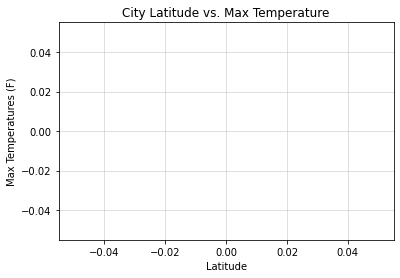

In [16]:
# Latitude vs. Max Temperature

plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp."], edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures (F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(alpha=0.5)
plt.savefig("Images/lat_temps.png")

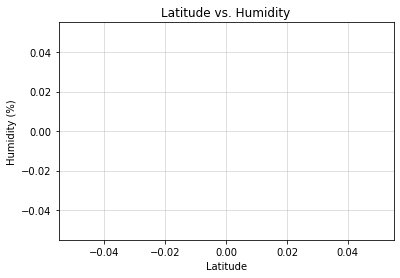

In [17]:
# Latitude vs. Humidity
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], edgecolors="black", facecolors= "blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")

plt.grid(alpha=0.5)
plt.savefig("Images/lat_humidity.png")

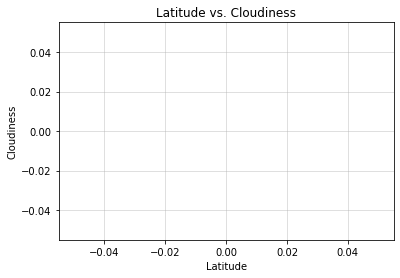

In [18]:
# Latitude vs Cloudiness

plt.scatter(clean_city_data["Lat"], clean_city_data["Cloud"], edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.grid(alpha=0.5)
plt.savefig("Images/Lat_Cloud.png")

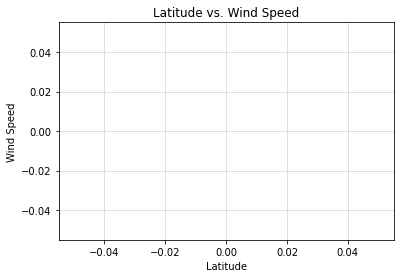

In [19]:
# Latitude vs. Wind Speed

plt.scatter(clean_city_data["Lat"], clean_city_data["Wind"], edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.grid(alpha=0.5)
plt.savefig("Images/Lat_Wind.png")

In [20]:
# Liner Regression - Max Temp vs. Latitude 
northern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp."]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(0,10), fontsize=20, color="red")
plt.savefig("Images/NH_Lat_temp_regress.png")
print(f"The rvalue is: {rvalue}")

ValueError: Inputs must not be empty.

In [ ]:
# Liner Regression - Max Temp vs. Latitude 
southern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] < 0])
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp."]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-40,40), fontsize=20, color="red")
plt.savefig("Images/SH_Lat_temp_regress.png")
print(f"The rvalue is: {rvalue}")

In [ ]:
# Northern Hempisphere Latitude vs. Humidity 
northern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(10,40), fontsize=20, color="red")
plt.savefig("Images/NH_Lat_Humidity_regress.png")
print(f"The rvalue is: {rvalue}")

In [ ]:
southern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] < 0])
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,40), fontsize=20, color="red")
plt.savefig("Images/SH_Lat_Humidity_regress.png")
print(f"The rvalue is: {rvalue}")

In [ ]:
northern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloud"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(10,27), fontsize=20, color="red")
plt.savefig("Images/NH_Lat_cloud_regress.png")
print(f"The rvalue is: {rvalue}")

In [ ]:
southern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] < 0])
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloud"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-50,23), fontsize=20, color="red")
plt.savefig("Images/SH_Lat_cloud_regress.png")
print(f"The rvalue is: {rvalue}")

In [ ]:
northern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(10,40), fontsize=20, color="red")
plt.savefig("Images/NH_Lat_wind_regress.png")
print(f"The rvalue is: {rvalue}")

In [ ]:
southern_hemisphere = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] < 0])
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-" )
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.annotate(line_eq,(-50,20), fontsize=20, color="red")
plt.savefig("Images/SH_Lat_wind_regress.png")
print(f"The rvalue is: {rvalue}")